In [1]:
import pandas as pd
from plot_outlier import Visualization_outlier # check distribution
import numpy as np
import matplotlib.pyplot as plt

Step Cleaning:

1. Load data
2. Join data tokped march april and shoope march april
3. check shape data
4. Drop Columns is not using and check shape again
4. check dtypes and change if dtypes is not true
5. Check missing nulls and distribution data,for numeric if skew using median and normal using mean
6. Fillna missing nulls
7. Sanichek process
8. Make new columns tokopedia and shoope to differentiate e_commerce
9. Check incosinstensi data and then rename or change values
10. Last, Join data tokopedia and shoope
11. Save data to excel and then analysis to tablaue

In [3]:
# load data
df_tokped_mar = pd.read_excel('D:/BOOTCAMP/test_kerja/March_Order.xlsx')
df_tokped_apr = pd.read_excel('D:/BOOTCAMP/test_kerja/April_Order.xlsx')
df_shoope_mar = pd.read_excel('D:/BOOTCAMP/test_kerja/shopee/March_Order.xlsx')
df_shoope_apr = pd.read_excel('D:/BOOTCAMP/test_kerja/shopee/April_Order.xlsx')

# Cleaning Data Tokped

In [4]:
# join data
join_data_tokped = df_tokped_mar.append(df_tokped_apr, ignore_index=True)

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\1635105826.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join_data_tokped = df_tokped_mar.append(df_tokped_apr, ignore_index=True)


In [5]:
join_data_tokped.shape

(507, 25)

In [6]:
# drop column is not used
merged_tokped = join_data_tokped.drop(columns=['Order ID', 'Order ID', 'Invoice', 'Product ID','Stock Keeping Unit (SKU)',
                                               'Notes','AWB', 'Warehouse Origin','user_id','Order Status','Insurance (Rp.)',
                                               'Shipping Price + fee (Rp.)','Campaign Name','Jenis Layanan','Bebas Ongkir',
                                               'Count','Price (Rp.)'])

In [7]:
# sanichek
merged_tokped.shape

(507, 9)

In [8]:
# check dtype
merged_tokped.dtypes

Payment Date                object
Product Name                object
Quantity                     int64
Discount Amount (Rp.)        int64
Subsidi Amount (Rp.)         int64
Courier                     object
Total Shipping Fee (Rp.)     int64
Total Amount (Rp.)           int64
city                        object
dtype: object

In [9]:
# change dtype object to datetime
merged_tokped['Payment Date'] = pd.to_datetime(merged_tokped['Payment Date'])

In [10]:
# sanichek dtypes
merged_tokped.dtypes

Payment Date                datetime64[ns]
Product Name                        object
Quantity                             int64
Discount Amount (Rp.)                int64
Subsidi Amount (Rp.)                 int64
Courier                             object
Total Shipping Fee (Rp.)             int64
Total Amount (Rp.)                   int64
city                                object
dtype: object

In [11]:
# Check month 
daftar_bulan = sorted(merged_tokped["Payment Date"].dt.strftime('%Y-%m').unique())

# Tampilkan daftar bulan
print("Daftar bulan yang tersedia: ")
for bulan in daftar_bulan:
    print(bulan)

Daftar bulan yang tersedia: 
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08
2021-09
2021-10
2021-11
2021-12


In [12]:
# because analysis just march and april order apples to apples then drop other months 
# >>the value will affect the missing nulls

selected_months = ["03", "04"]
merged_tokped = merged_tokped[merged_tokped["Payment Date"].dt.strftime('%m').isin(selected_months)]

In [13]:
# SaniCheck month 
daftar_bulan = sorted(merged_tokped["Payment Date"].dt.strftime('%Y-%m').unique())

# Tampilkan daftar bulan
print("Daftar bulan yang tersedia: ")
for bulan in daftar_bulan:
    print(bulan)

Daftar bulan yang tersedia: 
2021-03
2021-04


In [14]:
# check missing nulls
merged_tokped.isnull().sum()

Payment Date                0
Product Name                0
Quantity                    0
Discount Amount (Rp.)       0
Subsidi Amount (Rp.)        0
Courier                     0
Total Shipping Fee (Rp.)    0
Total Amount (Rp.)          0
city                        3
dtype: int64

C:\Users\HP Notebook\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


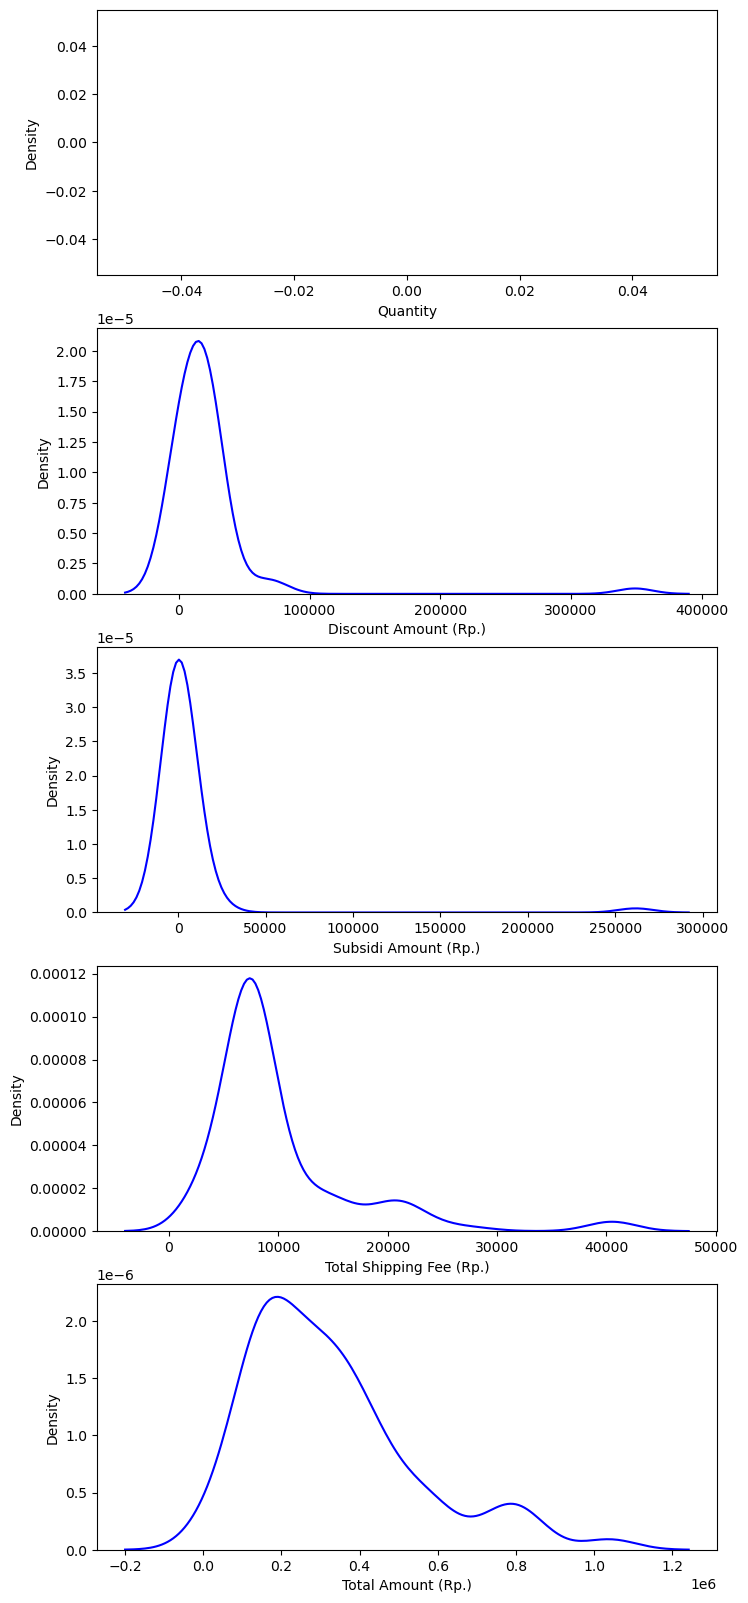

In [15]:
# check distribution data
dist_vis = Visualization_outlier(merged_tokped)
merged_tokped_vis =dist_vis.kdeplot()

In [16]:
# split numeric and category
category_cols_tokped = merged_tokped.select_dtypes(include=['object'])
numeric_cols_tokped = merged_tokped.select_dtypes(include=['number'])
selected_columns_numeric = merged_tokped.loc[:, ['Quantity']]
selected_date = merged_tokped.select_dtypes(include=['datetime64[ns]'])

In [17]:
# drop column 
numeric_cols_tokped_1 = numeric_cols_tokped.drop(columns=['Quantity'])

In [18]:
# fillna category
category_cols_tokped.fillna('unknown', inplace=True)

# fillna data dtype dist skew >> using median
median_col = numeric_cols_tokped_1.median() 

# fillna data dtype dist normal >> using mean
mean_col = selected_columns_numeric.mean()

numeric_cols_tokped_1.fillna(median_col, inplace=True)
selected_columns_numeric.fillna(mean_col, inplace=True)

In [19]:
# concat columns
data_clean_tokped = pd.concat([category_cols_tokped, numeric_cols_tokped_1, selected_columns_numeric,selected_date], axis=1)

In [20]:
# check nulls
data_clean_tokped.isnull().sum()

Product Name                0
Courier                     0
city                        0
Discount Amount (Rp.)       0
Subsidi Amount (Rp.)        0
Total Shipping Fee (Rp.)    0
Total Amount (Rp.)          0
Quantity                    0
Payment Date                0
dtype: int64

In [21]:
# chek shape
data_clean_tokped.shape

(328, 9)

In [22]:
# check duplicate
data_clean_tokped.duplicated().sum()

0

In [23]:
# add column e_commerce
data_clean_tokped['e_commerce'] = 'Tokopedia'

### Inconsistensi data

In [24]:
# change name Product Name to category product
data_clean_tokped["Category_product"] = None
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Tank Top")] = "Tank Top"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Celana")] = "pants"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Legging")] = "Legging "
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Celana Olahraga")] = "Legging"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("bra")] = "sports bra"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Bra")] = "sports bra"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Long")] = "long sleeve"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Short")] = "tshirt"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Headband")] = "accessories"
data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Jacket")] = "Jacket"

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\994633194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Tank Top")] = "Tank Top"
C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\994633194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_tokped["Category_product"][data_clean_tokped['Product Name'].str.contains("Celana")] = "pants"
C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\994633194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [25]:
# check missing nulls after rename inconsistensi data from category_product
data_clean_tokped.Category_product.isnull().sum()

0

In [26]:
# drop coloumns Product Name because change to category product
data_clean_tokped = data_clean_tokped.drop(columns=['Product Name'])

In [27]:
data_clean_tokped.head(2)

,Courier,city,Discount Amount (Rp.),Subsidi Amount (Rp.),Total Shipping Fee (Rp.),Total Amount (Rp.),Quantity,Payment Date,e_commerce,Category_product
23,JNE(OKE),Jakarta barat,0,0,6000,309500,1,2021-03-03 13:01:46,Tokopedia,sports bra
24,JNE(OKE),Jakarta barat,0,0,6000,309500,1,2021-03-03 13:01:46,Tokopedia,Tank Top


# Cleaning Data Shoope

In [28]:
# join data
join_data_shoope = df_shoope_mar.append(df_shoope_apr, ignore_index=True)

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\383263352.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join_data_shoope = df_shoope_mar.append(df_shoope_apr, ignore_index=True)


In [29]:
# drop column is not used
merged_shoope = join_data_shoope.drop(columns=['No. Pesanan','Status Pesanan', 'Status Pembatalan/ Pengembalian'
                                              ,'No. Resi', 'Antar ke counter/ pick-up','Paket Diskon (Diskon dari Shopee)'
                                              ,'Catatan dari Pembeli', 'Catatan', 'user_id','SKU Induk','Nomor Referensi SKU',
                                              'Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)', 'Waktu Pengiriman Diatur'
                                              ,'Waktu Pesanan Dibuat','Ongkos Kirim Dibayar oleh Pembeli','Voucher Ditanggung Penjual'
                                              ,'Voucher Ditanggung Shopee','Total Berat','Berat Produk','Paket Diskon (Diskon dari Penjual)'
                                              ,'Cashback Koin','Diskon Dari Shopee','Diskon Kartu Kredit','Nama Variasi','Paket Diskon','Jumlah'
                                              ,'Harga Awal','Harga Setelah Diskon','Total Harga Produk'])

In [30]:
# sanichek
merged_shoope.shape

(70, 10)

In [31]:
# check dtype
merged_shoope.dtypes

Opsi Pengiriman               object
Waktu Pembayaran Dilakukan    object
Nama Produk                   object
Total Diskon                  object
Diskon Dari Penjual           object
Jumlah Produk di Pesan         int64
Potongan Koin Shopee           int64
Total Pembayaran              object
Perkiraan Ongkos Kirim        object
city                          object
dtype: object

In [32]:
# rename values
merged_shoope['Total Pembayaran'] = merged_shoope['Total Pembayaran'].apply(lambda x : x.replace('Rp ',''))
merged_shoope['Perkiraan Ongkos Kirim'] = merged_shoope['Perkiraan Ongkos Kirim'].apply(lambda x : x.replace('Rp ',''))
merged_shoope['Total Diskon'] = merged_shoope['Total Diskon'].apply(lambda x : x.replace('Rp ',''))
merged_shoope['Diskon Dari Penjual'] = merged_shoope['Diskon Dari Penjual'].apply(lambda x : x.replace('Rp ',''))

# astype object to float
merged_shoope['Total Pembayaran'] = merged_shoope['Total Pembayaran'].astype('float64')
merged_shoope['Perkiraan Ongkos Kirim'] = merged_shoope['Perkiraan Ongkos Kirim'].astype('float64')
merged_shoope['Total Diskon'] = merged_shoope['Total Diskon'].astype('float64')

# astype object to datetime
merged_shoope['Waktu Pembayaran Dilakukan'] = pd.to_datetime(merged_shoope['Waktu Pembayaran Dilakukan'])

In [33]:
# check dtype
merged_shoope.dtypes

Opsi Pengiriman                       object
Waktu Pembayaran Dilakukan    datetime64[ns]
Nama Produk                           object
Total Diskon                         float64
Diskon Dari Penjual                   object
Jumlah Produk di Pesan                 int64
Potongan Koin Shopee                   int64
Total Pembayaran                     float64
Perkiraan Ongkos Kirim               float64
city                                  object
dtype: object

In [34]:
# rename kolom 
merged_shoope.rename(columns={"Waktu Pembayaran Dilakukan": "Payment Date", 'Total Pembayaran' : 'Total Amount (Rp.)',
                             'Jumlah Produk di Pesan' : 'Quantity', 'Perkiraan Ongkos Kirim' : 'Total Shipping Fee (Rp.)',
                             'Opsi Pengiriman' : 'Courier','Total Diskon' : 'Discount Amount (Rp.)', 'Diskon Dari Penjual' : 'Subsidi Amount (Rp.)' }, inplace=True)

In [35]:
# Check month 
daftar_bulan = sorted(merged_shoope["Payment Date"].dt.strftime('%Y-%m').unique())

# Tampilkan daftar bulan
print("Daftar bulan yang tersedia: ")
for bulan in daftar_bulan:
    print(bulan)

Daftar bulan yang tersedia: 
2021-03
2021-04


In [36]:
# check missing nulls
merged_shoope.isnull().sum()

Courier                     0
Payment Date                0
Nama Produk                 0
Discount Amount (Rp.)       0
Subsidi Amount (Rp.)        0
Quantity                    0
Potongan Koin Shopee        0
Total Amount (Rp.)          0
Total Shipping Fee (Rp.)    0
city                        0
dtype: int64

In [37]:
# check duplicate
merged_shoope.duplicated().sum()

4

In [38]:
# add column e_commerce
merged_shoope['e_commerce'] = 'Shoope'

### Inconsistensi Data

In [39]:
# change name Nama Produk to category product
merged_shoope["Category_product"] = None
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Tank Top")] = "Tank Top"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Celana")] = "pants"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Legging")] = "Legging "
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Celana Olahraga")] = "Legging"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("bra")] = "sports bra"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Bra")] = "sports bra"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Long")] = "long sleeve"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Short")] = "tshirt"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Headband")] = "accessories"
merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Jacket")] = "Jacket"

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\1573203240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Tank Top")] = "Tank Top"
C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\1573203240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_shoope["Category_product"][merged_shoope['Nama Produk'].str.contains("Celana")] = "pants"
C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\1573203240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [40]:
# check missing nulls after rename inconsistensi data from category_product
merged_shoope.Category_product.isnull().sum()

0

In [41]:
# drop coloumns Product Name because change to category product
merged_shoope = merged_shoope.drop(columns=['Nama Produk'])

In [42]:
# join data shoope and tokopedia
data_analisa = merged_shoope.append(data_clean_tokped, ignore_index=True)

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_8924\2465355267.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_analisa = merged_shoope.append(data_clean_tokped, ignore_index=True)


In [43]:
# sanichek
data_analisa.isnull().sum()

Courier                       0
Payment Date                  0
Discount Amount (Rp.)         0
Subsidi Amount (Rp.)          0
Quantity                      0
Potongan Koin Shopee        328
Total Amount (Rp.)            0
Total Shipping Fee (Rp.)      0
city                          0
e_commerce                    0
Category_product              0
dtype: int64

In [44]:
# inconsistensi data
data_analisa.Courier.unique()

array(['J&T Express', 'SiCepat REG', 'GrabExpress Instant', 'Anteraja',
       'Reguler\nSiCepat REG', 'Reguler\nAnteraja',
       'JNE Reguler (Cashless)', 'Reguler\nJNE Reguler (Cashless)',
       'Reguler\nJ&T Express', 'Instant\nGrabExpress Instant', 'JNE(OKE)',
       'AnterAja(Reguler)', 'SiCepat(Regular Package)', 'SiCepat(HALU)',
       'JNE(YES)', 'J&T(Reguler)', 'Gojek(Instant Courier)',
       'GrabExpress(Instant)'], dtype=object)

In [45]:
# inconsistensi data
data_analisa.city.unique()

array(['Tangerang Selatan', 'Bogor', 'Surabaya', 'Jakarta Selatan',
       'Denpasar', 'Semarang', 'Bengkulu', 'Jakarta Barat',
       'Jakarta Utara', 'Gorontalo', 'Jakarta Pusat', 'Tulungagung',
       'Palembang', 'Bekasi', 'Sleman', 'Bandung', 'Serang', 'Cimahi',
       'Tarakan', 'Batam', 'Tangerang', 'Badung', 'Jakarta barat',
       'Jakarta selatan', 'Parigi moutong', 'unknown', 'Mataram', 'Dumai',
       'Surakarta', 'Jakarta utara', 'Buleleng', 'Jakarta pusat', 'Pati',
       'Tasikmalaya', 'Padang', 'Bangka', 'Cilegon', 'Sidoarjo', 'Depok',
       'Gianyar', 'Jakarta timur', 'Malaka', 'Belitung', 'Banda aceh',
       'Bintan', 'Landak', 'Kupang', 'Makassar', 'Lebak', 'Sukoharjo',
       'Ketapang', 'Ende', 'Tegal', 'Kerinci', 'Malang', 'Belu', 'Medan'],
      dtype=object)

In [46]:
# rename inconsistensi data city
data_analisa['city'] = data_analisa['city'].replace('Badung', 'Bandung')
data_analisa['city'] = data_analisa['city'].replace('Jakarta selatan', 'Jakarta Selatan')
data_analisa['city'] = data_analisa['city'].replace('Jakarta barat', 'Jakarta Barat')
data_analisa['city'] = data_analisa['city'].replace('Jakarta pusat', 'Jakarta Pusat')
data_analisa['city'] = data_analisa['city'].replace('Jakarta utara', 'Jakarta Utara')

In [47]:
# rename inconsistensi data Courier
data_analisa['Courier'] = data_analisa['Courier'].replace('Reguler\nJNE Reguler (Cashless)', 'JNE Reguler (Cashless)')
data_analisa['Courier'] = data_analisa['Courier'].replace('Instant\nGrabExpress Instant', 'GrabExpress(Instant)')
data_analisa['Courier'] = data_analisa['Courier'].replace('Gojek(Instant Courier)', 'GrabExpress(Instant)')
data_analisa['Courier'] = data_analisa['Courier'].replace('GrabExpress Instant', 'GrabExpress(Instant)')
data_analisa['Courier'] = data_analisa['Courier'].replace('Reguler\nSiCepat REG', 'SiCepat REG')
data_analisa['Courier'] = data_analisa['Courier'].replace('SiCepat(Regular Package)', 'SiCepat REG')
data_analisa['Courier'] = data_analisa['Courier'].replace('Reguler\nAnteraja', 'AnterAja(Reguler)')
data_analisa['Courier'] = data_analisa['Courier'].replace('JNE Reguler (Cashless)', 'J&T(Reguler)')
data_analisa['Courier'] = data_analisa['Courier'].replace('Reguler\nJ&T Express', 'J&T Express')
data_analisa['Courier'] = data_analisa['Courier'].replace('Anteraja', 'AnterAja(Reguler)')

In [48]:
# sanichek unique
data_analisa.Courier.unique()

array(['J&T Express', 'SiCepat REG', 'GrabExpress(Instant)',
       'AnterAja(Reguler)', 'J&T(Reguler)', 'JNE(OKE)', 'SiCepat(HALU)',
       'JNE(YES)'], dtype=object)

In [49]:
# save data to csv

data_analisa.to_excel('data_minilistic.xlsx', index=False)

# EDA

Topic >>> Compensation sales amount based on products sold

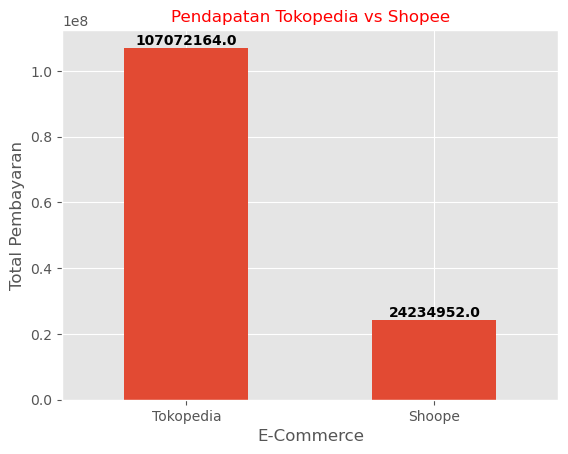

In [50]:
# membuat grup berdasarkan e-commerce dan menghitung total pembayaran untuk masing-masing e-commerce
compare_sales = data_analisa.groupby(["e_commerce"]).agg({"Total Amount (Rp.)": "sum"}).sort_values(by="Total Amount (Rp.)", ascending=False)

# visualization
plt.style.use('ggplot')
compare_sales.plot(kind="bar", rot=0, legend=False)
plt.xlabel("E-Commerce")
plt.ylabel("Total Pembayaran")
plt.title("Pendapatan Tokopedia vs Shopee", fontsize=12 , c = 'r')
for i, value in enumerate(compare_sales.values):
    plt.text(i, value[0] + 1, str(value[0]), ha='center', va='bottom', fontweight='bold')
plt.show()

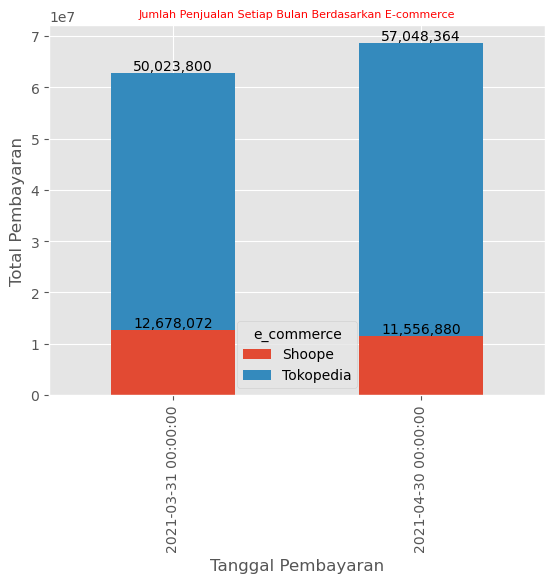

In [51]:
# membuat grup berdasarkan tanggal pembayaran dan e-commerce, kemudian menghitung total pembayaran untuk masing-masing tanggal dan e-commerce
compare_sales_date = data_analisa.groupby([pd.Grouper(key="Payment Date", freq="M"), "e_commerce"]).agg({"Total Amount (Rp.)": "sum"}).sort_values(by=["Payment Date"], ascending=False)

# membuat pivot table
pivot_table = compare_sales_date.pivot_table(index="Payment Date", columns="e_commerce", values="Total Amount (Rp.)")

# menampilkan visualisasi grafik stackbar
ax = pivot_table.plot(kind="bar", stacked=True)
ax.set_xlabel("Tanggal Pembayaran")
ax.set_ylabel("Total Pembayaran")
plt.title("Jumlah Penjualan Setiap Bulan Berdasarkan E-commerce", fontsize=8, c='r')

# menampilkan nilai setiap stack bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', labels=[f"{int(v):,}" if not np.isnan(v) else "" for v in container.datavalues])

plt.show()